### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

C:\Users\chiko\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\chiko\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\chiko\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\chiko\anaconda3\envs\PythonData\lib\site-packages

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df.STATUS.value_counts()
application_df.INCOME_AMT.value_counts()
application_df.SPECIAL_CONSIDERATIONS.value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#Drop STATUS columns

application_df.drop(['EIN', 'NAME','STATUS'], axis = 1, inplace=True)

In [4]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,142590,1


In [5]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
aff_counts = application_df.AFFILIATION.value_counts()
aff_counts.head(40)

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [7]:
# Determine which values to replace if counts are less than ...?
replace_aff = list(aff_counts[aff_counts < 50].index)

# Replace in dataframe
for aff in replace_aff:
    application_df.AFFILIATION = application_df.AFFILIATION.replace(aff,"Other")
    
# Check to make sure binning was successful
application_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Family/Parent          64
Other                  50
Name: AFFILIATION, dtype: int64

In [8]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

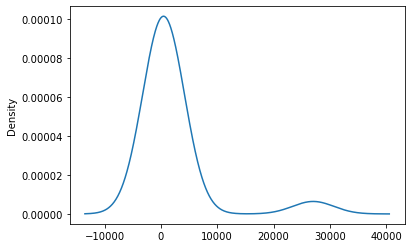

In [9]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [10]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type_counts[application_type_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2600        1
C1236        1
C1248        1
C4200        1
C1900        1
Name: CLASSIFICATION, Length: 71, dtype: int64

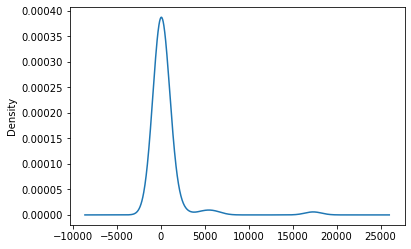

In [12]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [13]:
# Determine which values to replace if counts are less than ..?
#Decrease conts from 1883 to 2000
replace_class = list(classification_counts[classification_counts < 2000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [14]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [15]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 20
nn = tf.keras.models.Sequential()

# First hidden layer

nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Check the structure of the model
nn.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3120      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                4050      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 8,211
Trainable params: 8,211
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [21]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

In [23]:
# Train the model
#Change epochs from 100 to 40
fit_model = nn.fit(X_train,y_train,epochs=40,callbacks=[cp_callback])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/40
   32/25724 [..............................] - ETA: 1:11 - loss: 7.7125 - acc: 0.5000
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 1024/25724 [>.............................] - ETA: 3s - loss: 8.3602 - acc: 0.4580  
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 2240/25724 [=>............................] - ETA: 2s - loss: 8.2289 - acc: 0.4665
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 3456/25724 [===>..........................] - ETA: 1s - loss: 8.2748 - acc: 0.4635
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 4704/25724 [====>.........................] - ETA: 1s - loss: 8.2699 - acc: 0.4639
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 6048/25724 [======>.......................] - ETA: 1s - loss: 8.2226 - acc: 0.4669
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/wei

 8960/25724 [=========>....................] - ETA: 0s - loss: 8.2375 - acc: 0.4660
Epoch 00003: saving model to checkpoints/weights.03.hdf5
10272/25724 [==========>...................] - ETA: 0s - loss: 8.2441 - acc: 0.4655
Epoch 00003: saving model to checkpoints/weights.03.hdf5
11648/25724 [============>.................] - ETA: 0s - loss: 8.2183 - acc: 0.4672
Epoch 00003: saving model to checkpoints/weights.03.hdf5
13024/25724 [==============>...............] - ETA: 0s - loss: 8.2135 - acc: 0.4675
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
14080/25724 [===============>..............] - ETA: 0s - loss: 8.1934 - acc: 0.4688
Epoch 00003: saving model to checkpoints/weights.03.hdf5
15392/25724 [================>.............] - ETA: 0s - loss: 8.2065 - acc: 0.4680
Epoch 00003: saving model to checkpoints/weights.03.hdf5
16672/25724 [==================>...........] - ETA: 0s - loss: 8.2065 - acc: 0.4680
Epoch 00003:


Epoch 00005: saving model to checkpoints/weights.05.hdf5
24064/25724 [===========================>..] - ETA: 0s - loss: 8.2182 - acc: 0.4672
Epoch 00005: saving model to checkpoints/weights.05.hdf5
25724/25724 [==============================] - 1s 42us/sample - loss: 8.2126 - acc: 0.4676
Epoch 6/40
   32/25724 [..............................] - ETA: 2s - loss: 7.7125 - acc: 0.5000
Epoch 00006: saving model to checkpoints/weights.06.hdf5
 1280/25724 [>.............................] - ETA: 1s - loss: 8.0740 - acc: 0.4766
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 2432/25724 [=>............................] - ETA: 1s - loss: 8.2199 - acc: 0.4671
Epoch 00006: saving model to checkpoints/weights.06.hdf5
 3712/25724 [===>..........................] - ETA: 0s - loss: 8.2070 - acc: 0.4679
Epoch 00006: saving model to checkpoints/weights.06.hdf5
 4960/25724 [====>.........................] - ETA: 0s - loss: 8.2380 - acc: 

10784/25724 [===========>..................] - ETA: 0s - loss: 8.2045 - acc: 0.4681
Epoch 00008: saving model to checkpoints/weights.08.hdf5
11968/25724 [============>.................] - ETA: 0s - loss: 8.1816 - acc: 0.4696
Epoch 00008: saving model to checkpoints/weights.08.hdf5
13184/25724 [==============>...............] - ETA: 0s - loss: 8.1723 - acc: 0.4702
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
14464/25724 [===============>..............] - ETA: 0s - loss: 8.1614 - acc: 0.4709
Epoch 00008: saving model to checkpoints/weights.08.hdf5
15712/25724 [=================>............] - ETA: 0s - loss: 8.1582 - acc: 0.4711
Epoch 00008: saving model to checkpoints/weights.08.hdf5
16832/25724 [==================>...........] - ETA: 0s - loss: 8.1661 - acc: 0.4706
Epoch 00008: saving model to checkpoints/weights.08.hdf5
18048/25724 [====================>.........] - ETA: 0s - loss: 8.1637 - acc: 0.4707
Epoch 00008:

22112/25724 [========================>.....] - ETA: 0s - loss: 8.2154 - acc: 0.4674
Epoch 00010: saving model to checkpoints/weights.10.hdf5
23392/25724 [==========================>...] - ETA: 0s - loss: 8.2196 - acc: 0.4671
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
24448/25724 [===========================>..] - ETA: 0s - loss: 8.2071 - acc: 0.4679
Epoch 00010: saving model to checkpoints/weights.10.hdf5
25724/25724 [==============================] - 1s 45us/sample - loss: 8.2126 - acc: 0.4676
Epoch 11/40
   32/25724 [..............................] - ETA: 1s - loss: 5.7844 - acc: 0.6250
Epoch 00011: saving model to checkpoints/weights.11.hdf5
 1088/25724 [>.............................] - ETA: 1s - loss: 8.5206 - acc: 0.4476
Epoch 00011: saving model to checkpoints/weights.11.hdf5
 2240/25724 [=>............................] - ETA: 1s - loss: 8.3116 - acc: 0.4612
Epoch 00011: saving model to checkpoints/weights.1

 6912/25724 [=======>......................] - ETA: 0s - loss: 8.2347 - acc: 0.4661
Epoch 00013: saving model to checkpoints/weights.13.hdf5
 8096/25724 [========>.....................] - ETA: 0s - loss: 8.2783 - acc: 0.4633
Epoch 00013: saving model to checkpoints/weights.13.hdf5
 9472/25724 [==========>...................] - ETA: 0s - loss: 8.2759 - acc: 0.4635
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
10752/25724 [===========>..................] - ETA: 0s - loss: 8.2921 - acc: 0.4624
Epoch 00013: saving model to checkpoints/weights.13.hdf5
12128/25724 [=============>................] - ETA: 0s - loss: 8.2657 - acc: 0.4641
Epoch 00013: saving model to checkpoints/weights.13.hdf5
13472/25724 [==============>...............] - ETA: 0s - loss: 8.2472 - acc: 0.4653
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
14848/25724 [================>........


Epoch 00015: saving model to checkpoints/weights.15.hdf5
21760/25724 [========================>.....] - ETA: 0s - loss: 8.2321 - acc: 0.4663
Epoch 00015: saving model to checkpoints/weights.15.hdf5
23008/25724 [=========================>....] - ETA: 0s - loss: 8.2213 - acc: 0.4670
Epoch 00015: saving model to checkpoints/weights.15.hdf5
24192/25724 [===========================>..] - ETA: 0s - loss: 8.2245 - acc: 0.4668
Epoch 00015: saving model to checkpoints/weights.15.hdf5
25724/25724 [==============================] - 1s 42us/sample - loss: 8.2126 - acc: 0.4676
Epoch 16/40
   32/25724 [..............................] - ETA: 1s - loss: 8.6765 - acc: 0.4375
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 1152/25724 [>.............................] - ETA: 1s - loss: 8.2882 - acc: 0.4627
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 2464/25724 [=>............................] - ETA: 1s - loss: 8.2321 - acc:

 8832/25724 [=========>....................] - ETA: 0s - loss: 8.3045 - acc: 0.4616
Epoch 00018: saving model to checkpoints/weights.18.hdf5
10080/25724 [==========>...................] - ETA: 0s - loss: 8.3215 - acc: 0.4605
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
11136/25724 [===========>..................] - ETA: 0s - loss: 8.3261 - acc: 0.4602
Epoch 00018: saving model to checkpoints/weights.18.hdf5
12416/25724 [=============>................] - ETA: 0s - loss: 8.2939 - acc: 0.4623
Epoch 00018: saving model to checkpoints/weights.18.hdf5
13664/25724 [==============>...............] - ETA: 0s - loss: 8.2656 - acc: 0.4641
Epoch 00018: saving model to checkpoints/weights.18.hdf5
14912/25724 [================>.............] - ETA: 0s - loss: 8.2876 - acc: 0.4627
Epoch 00018: saving model to checkpoints/weights.18.hdf5
16160/25724 [=================>............] - ETA: 0s - loss: 8.2556 - acc: 0.4648
Epoch 00018:

20768/25724 [=======================>......] - ETA: 0s - loss: 8.2242 - acc: 0.4668
Epoch 00020: saving model to checkpoints/weights.20.hdf5
22080/25724 [========================>.....] - ETA: 0s - loss: 8.2245 - acc: 0.4668
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
23168/25724 [==========================>...] - ETA: 0s - loss: 8.2225 - acc: 0.4669
Epoch 00020: saving model to checkpoints/weights.20.hdf5
24384/25724 [===========================>..] - ETA: 0s - loss: 8.2116 - acc: 0.4676
Epoch 00020: saving model to checkpoints/weights.20.hdf5
25724/25724 [==============================] - 1s 43us/sample - loss: 8.2126 - acc: 0.4676
Epoch 21/40
   32/25724 [..............................] - ETA: 2s - loss: 10.1226 - acc: 0.3438
Epoch 00021: saving model to checkpoints/weights.21.hdf5
 1216/25724 [>.............................] - ETA: 1s - loss: 8.2199 - acc: 0.4671 
Epoch 00021: saving model to checkpoints/weights

 5728/25724 [=====>........................] - ETA: 0s - loss: 8.2591 - acc: 0.4646
Epoch 00023: saving model to checkpoints/weights.23.hdf5
 7040/25724 [=======>......................] - ETA: 0s - loss: 8.2580 - acc: 0.4646
Epoch 00023: saving model to checkpoints/weights.23.hdf5
 8416/25724 [========>.....................] - ETA: 0s - loss: 8.2788 - acc: 0.4633
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
 9472/25724 [==========>...................] - ETA: 0s - loss: 8.2938 - acc: 0.4623
Epoch 00023: saving model to checkpoints/weights.23.hdf5
10656/25724 [===========>..................] - ETA: 0s - loss: 8.2669 - acc: 0.4641
Epoch 00023: saving model to checkpoints/weights.23.hdf5
11840/25724 [============>.................] - ETA: 0s - loss: 8.2583 - acc: 0.4646
Epoch 00023: saving model to checkpoints/weights.23.hdf5
13056/25724 [==============>...............] - ETA: 0s - loss: 8.2666 - acc: 0.4641
Epoch 00023:

17408/25724 [===================>..........] - ETA: 0s - loss: 8.1892 - acc: 0.4691
Epoch 00025: saving model to checkpoints/weights.25.hdf5
18624/25724 [====================>.........] - ETA: 0s - loss: 8.2020 - acc: 0.4683
Epoch 00025: saving model to checkpoints/weights.25.hdf5
19808/25724 [======================>.......] - ETA: 0s - loss: 8.2000 - acc: 0.4684
Epoch 00025: saving model to checkpoints/weights.25.hdf5
21088/25724 [=======================>......] - ETA: 0s - loss: 8.1872 - acc: 0.4692
Epoch 00025: saving model to checkpoints/weights.25.hdf5
22304/25724 [=========================>....] - ETA: 0s - loss: 8.1641 - acc: 0.4707
Epoch 00025: saving model to checkpoints/weights.25.hdf5
23520/25724 [==========================>...] - ETA: 0s - loss: 8.1801 - acc: 0.4697
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 8.1964 - acc: 0.4686
Epoch 00025:

 3520/25724 [===>..........................] - ETA: 0s - loss: 8.2865 - acc: 0.4628
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 4736/25724 [====>.........................] - ETA: 0s - loss: 8.3378 - acc: 0.4595
Epoch 00028: saving model to checkpoints/weights.28.hdf5
 6048/25724 [======>.......................] - ETA: 0s - loss: 8.2787 - acc: 0.4633
Epoch 00028: saving model to checkpoints/weights.28.hdf5
 7264/25724 [=======>......................] - ETA: 0s - loss: 8.2476 - acc: 0.4653
Epoch 00028: saving model to checkpoints/weights.28.hdf5
 8448/25724 [========>.....................] - ETA: 0s - loss: 8.2456 - acc: 0.4654
Epoch 00028: saving model to checkpoints/weights.28.hdf5
 9664/25724 [==========>...................] - ETA: 0s - loss: 8.2312 - acc: 0.4664
Epoch 00028: saving model to checkpoints/weights.28.hdf5
10848/25724 [===========>..................] - ETA: 0s - loss: 8.2301 - acc: 0.4664
Epoch 00028:

15744/25724 [=================>............] - ETA: 0s - loss: 8.1867 - acc: 0.4693
Epoch 00030: saving model to checkpoints/weights.30.hdf5
16928/25724 [==================>...........] - ETA: 0s - loss: 8.1790 - acc: 0.4698
Epoch 00030: saving model to checkpoints/weights.30.hdf5
18048/25724 [====================>.........] - ETA: 0s - loss: 8.2022 - acc: 0.4683
Epoch 00030: saving model to checkpoints/weights.30.hdf5
19200/25724 [=====================>........] - ETA: 0s - loss: 8.2234 - acc: 0.4669
Epoch 00030: saving model to checkpoints/weights.30.hdf5
20288/25724 [======================>.......] - ETA: 0s - loss: 8.2173 - acc: 0.4673
Epoch 00030: saving model to checkpoints/weights.30.hdf5
21504/25724 [========================>.....] - ETA: 0s - loss: 8.2160 - acc: 0.4674
Epoch 00030: saving model to checkpoints/weights.30.hdf5
22656/25724 [=========================>....] - ETA: 0s - loss: 8.2354 - acc: 0.4661
Epoch 00030: saving model to checkpoints/weights.30.hdf5
23904/25724 [

 1408/25724 [>.............................] - ETA: 0s - loss: 8.0083 - acc: 0.4808
Epoch 00033: saving model to checkpoints/weights.33.hdf5
 2688/25724 [==>...........................] - ETA: 0s - loss: 8.0396 - acc: 0.4788
Epoch 00033: saving model to checkpoints/weights.33.hdf5
 3968/25724 [===>..........................] - ETA: 0s - loss: 8.3033 - acc: 0.4617
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 5120/25724 [====>.........................] - ETA: 0s - loss: 8.2819 - acc: 0.4631
Epoch 00033: saving model to checkpoints/weights.33.hdf5
 6560/25724 [======>.......................] - ETA: 0s - loss: 8.1992 - acc: 0.4684
Epoch 00033: saving model to checkpoints/weights.33.hdf5
 7776/25724 [========>.....................] - ETA: 0s - loss: 8.1667 - acc: 0.4706
Epoch 00033: saving model to checkpoints/weights.33.hdf5
 8992/25724 [=========>....................] - ETA: 0s - loss: 8.1979 - acc: 0.4685
Epoch 00033:

12960/25724 [==============>...............] - ETA: 0s - loss: 8.2243 - acc: 0.4668
Epoch 00035: saving model to checkpoints/weights.35.hdf5
14048/25724 [===============>..............] - ETA: 0s - loss: 8.2263 - acc: 0.4667
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
15104/25724 [================>.............] - ETA: 0s - loss: 8.2108 - acc: 0.4677
Epoch 00035: saving model to checkpoints/weights.35.hdf5
16288/25724 [=================>............] - ETA: 0s - loss: 8.1936 - acc: 0.4688
Epoch 00035: saving model to checkpoints/weights.35.hdf5
17440/25724 [===================>..........] - ETA: 0s - loss: 8.1777 - acc: 0.4698
Epoch 00035: saving model to checkpoints/weights.35.hdf5
18656/25724 [====================>.........] - ETA: 0s - loss: 8.1804 - acc: 0.4697
Epoch 00035: saving model to checkpoints/weights.35.hdf5
19872/25724 [======================>.......] - ETA: 0s - loss: 8.1627 - acc: 0.4708
Epoch 00035:

24576/25724 [===========================>..] - ETA: 0s - loss: 8.2127 - acc: 0.4676
Epoch 00037: saving model to checkpoints/weights.37.hdf5
25724/25724 [==============================] - 1s 44us/sample - loss: 8.2126 - acc: 0.4676
Epoch 38/40
   32/25724 [..............................] - ETA: 2s - loss: 8.6765 - acc: 0.4375
Epoch 00038: saving model to checkpoints/weights.38.hdf5
  832/25724 [..............................] - ETA: 1s - loss: 8.6951 - acc: 0.4363
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 1472/25724 [>.............................] - ETA: 1s - loss: 8.6346 - acc: 0.4402
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 2432/25724 [=>............................] - ETA: 1s - loss: 8.6195 - acc: 0.4412
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 3616/25724 [===>..........................] - ETA: 1s - loss: 8.3566 - acc: 0.4582
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 4736/25724 [====>.........................] - ETA:

11392/25724 [============>.................] - ETA: 0s - loss: 8.1241 - acc: 0.4733
Epoch 00040: saving model to checkpoints/weights.40.hdf5
13056/25724 [==============>...............] - ETA: 0s - loss: 8.1213 - acc: 0.4735
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
14464/25724 [===============>..............] - ETA: 0s - loss: 8.1241 - acc: 0.4733
Epoch 00040: saving model to checkpoints/weights.40.hdf5
15936/25724 [=================>............] - ETA: 0s - loss: 8.1345 - acc: 0.4726
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
17536/25724 [===================>..........] - ETA: 0s - loss: 8.1514 - acc: 0.4715
Epoch 00040: saving model to checkpoints/weights.40.hdf5
18912/25724 [=====================>........] - ETA: 0s - loss: 8.1741 - acc: 0.4701
Epoch 00040: saving model to checkpoints/weights.40.hdf5
20096/25724 [======================>..

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 6.0836 - acc: 0.4671
Loss: 6.083593075476999, Accuracy: 0.46705538034439087


In [25]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 20

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.40.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 6.0836 - acc: 0.4671
Loss: 6.083593075476999, Accuracy: 0.46705538034439087


In [26]:
# Export our model to HDF5 file
nn_new.save("AlphabetSoupCharity.h5")

# activation function of output layers is changed for from sigmoid to tanh -->decrease accuracy